# 6.5 Unsupervised Machine Learning of the WHR with Clustering Algorithms

## Objective 

### 1. Import libraries 
### 2. Import dataframes
### 3. Dimension Checks
### 4. Subsetting
### 5. Elbow Technique
### 6. k-means Clustering Algorithm
### 7. Exporting dataframe

# 01. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Verify matplotlib version

matplotlib.__version__

'3.5.2'

# 02. Import Dataframe

In [4]:
# Import dataframe by creating shortcut to data file and verify

path = r'/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/6 Advanced Analytics and Dashboard Design/World Happiness Report Jun2020'

print(path)

/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/6 Advanced Analytics and Dashboard Design/World Happiness Report Jun2020


In [5]:
# Import dataframe

WHR_ALLYEARS = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_ALLYEARS.pkl'))

# 03. Dimension Checks

In [6]:
# Dimension Checks Summary of WHR All Years dataframe

def check_df(WHR_ALLYEARS):
    print('---------- WHR ALL YEARS SUMMARY----------')
    print(' ')
    print('***** SHAPE *****')
    print(WHR_ALLYEARS.shape)
    print(' ')
    print('***** COLUMNS AS LIST *****')
    print(WHR_ALLYEARS.columns.to_list())
    print(' ')
    print('***** DATA TYPES *****')
    print(WHR_ALLYEARS.dtypes)
    print(' ')
    print('***** FIRST FIVE ROWS *****')
    print(WHR_ALLYEARS.head())
    print(' ')
    print('****** LAST FIVE ROWS ******')
    print(WHR_ALLYEARS.tail())

check_df(WHR_ALLYEARS)

---------- WHR ALL YEARS SUMMARY----------
 
***** SHAPE *****
(777, 11)
 
***** COLUMNS AS LIST *****
['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
***** DATA TYPES *****
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
***** FIRST FIVE ROWS *****
   Year      Country          Region  Happiness Rank  Happiness Score  \
0  2015  Switzerland  Western Europe               1            7.587   
1  2015      Iceland  Western Europe               2            7.561   
2  2015      Denmark  Western Europe               3            7.527   
3  2015       Norway  Western Europe               4            7.522   
4  2015       Canada   North Ameri

# 04. Data Consistency Checks

In [7]:
# Check for Duplicates

WHR_ALLYEARS.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 777, dtype: bool

In [8]:
# Check for missing Values

WHR_ALLYEARS.isnull().sum()

Year               0
Country            0
Region             0
Happiness Rank     0
Happiness Score    0
Economy            0
Family             0
Freedom            0
Generosity         0
Health             0
Trust              1
dtype: int64

In [9]:
# Create subset of dataframe to view the row with missing value 

WHR_ALLYEARSTRUSTMISS = WHR_ALLYEARS[WHR_ALLYEARS['Trust'].isnull() == True]

In [10]:
# View subset dataframe

WHR_ALLYEARSTRUSTMISS

Year               Country                           Region  \
19  2018  United Arab Emirates  Middle East and Northern Africa   

    Happiness Rank  Happiness Score  Economy  Family  Freedom  Generosity  \
19              20            6.774    2.096   0.776    0.284       0.186   

    Health  Trust  
19    0.67    NaN

In [11]:
# Subsetting; Creating to determine mean value of Trust for United Arab Emirates

WHR_ALLYEARSTRUSTMISS1 = WHR_ALLYEARS[WHR_ALLYEARS['Country'] == ('United Arab Emirates')]

In [12]:
WHR_ALLYEARSTRUSTMISS1

Year               Country                           Region  \
19  2015  United Arab Emirates  Middle East and Northern Africa   
27  2016  United Arab Emirates  Middle East and Northern Africa   
20  2017  United Arab Emirates  Middle East and Northern Africa   
19  2018  United Arab Emirates  Middle East and Northern Africa   
20  2019  United Arab Emirates  Middle East and Northern Africa   

    Happiness Rank  Happiness Score  Economy  Family  Freedom  Generosity  \
19              20            6.901   1.4273  1.1258   0.6416      0.2643   
27              28            6.573   1.5735  0.8711   0.5622      0.2659   
20              21            6.648   1.6263  1.2664   0.6083      0.3609   
19              20            6.774   2.0960  0.7760   0.2840      0.1860   
20              21            6.825   1.5030  1.3100   0.5980      0.2620   

    Health   Trust  
19  0.8093  0.3858  
27  0.7299  0.3556  
20  0.7268  0.3245  
19  0.6700     NaN  
20  0.8250  0.1820

In [13]:
# Determing mean value

WHR_ALLYEARSTRUSTMISS1.groupby('Country').agg({'Trust': ['mean', 'min', 'max']})

Trust               
                          mean    min     max
Country                                      
United Arab Emirates  0.311975  0.182  0.3858

In [14]:
# Replace missing value 

WHR_ALLYEARS['Trust'].fillna(0.311975, inplace=False)

0      0.4198
1      0.1415
2      0.4836
3      0.3650
4      0.3296
        ...  
151    0.4110
152    0.1470
153    0.0250
154    0.0350
155    0.0910
Name: Trust, Length: 777, dtype: float64

In [15]:
# View to see if missing value was replaced

WHR_ALLYEARS.loc[(WHR_ALLYEARS)['Country'] == 'United Arab Emirates']

## value not replaced 

Year               Country                           Region  \
19  2015  United Arab Emirates  Middle East and Northern Africa   
27  2016  United Arab Emirates  Middle East and Northern Africa   
20  2017  United Arab Emirates  Middle East and Northern Africa   
19  2018  United Arab Emirates  Middle East and Northern Africa   
20  2019  United Arab Emirates  Middle East and Northern Africa   

    Happiness Rank  Happiness Score  Economy  Family  Freedom  Generosity  \
19              20            6.901   1.4273  1.1258   0.6416      0.2643   
27              28            6.573   1.5735  0.8711   0.5622      0.2659   
20              21            6.648   1.6263  1.2664   0.6083      0.3609   
19              20            6.774   2.0960  0.7760   0.2840      0.1860   
20              21            6.825   1.5030  1.3100   0.5980      0.2620   

    Health   Trust  
19  0.8093  0.3858  
27  0.7299  0.3556  
20  0.7268  0.3245  
19  0.6700     NaN  
20  0.8250  0.1820

In [16]:
# Replace missing value with mean value 

WHR_ALLYEARS.fillna(0.311975, inplace=True)

In [17]:
# View if missing value was replaced with mean value

WHR_ALLYEARS.loc[(WHR_ALLYEARS)['Country'] == 'United Arab Emirates']

Year               Country                           Region  \
19  2015  United Arab Emirates  Middle East and Northern Africa   
27  2016  United Arab Emirates  Middle East and Northern Africa   
20  2017  United Arab Emirates  Middle East and Northern Africa   
19  2018  United Arab Emirates  Middle East and Northern Africa   
20  2019  United Arab Emirates  Middle East and Northern Africa   

    Happiness Rank  Happiness Score  Economy  Family  Freedom  Generosity  \
19              20            6.901   1.4273  1.1258   0.6416      0.2643   
27              28            6.573   1.5735  0.8711   0.5622      0.2659   
20              21            6.648   1.6263  1.2664   0.6083      0.3609   
19              20            6.774   2.0960  0.7760   0.2840      0.1860   
20              21            6.825   1.5030  1.3100   0.5980      0.2620   

    Health     Trust  
19  0.8093  0.385800  
27  0.7299  0.355600  
20  0.7268  0.324500  
19  0.6700  0.311975  
20  0.8250  0.182000

# 04. Subsetting Dataframe

In [18]:
# Remove columns that are categorical 

whr_allyearssub = WHR_ALLYEARS.drop(columns = ['Country', 'Region'])

In [19]:
# View first five rows of new dataframe with removed columns

whr_allyearssub.head()

Year  Happiness Rank  Happiness Score  Economy  Family  Freedom  \
0  2015               1            7.587   1.3965  1.3495   0.6656   
1  2015               2            7.561   1.3023  1.4022   0.6288   
2  2015               3            7.527   1.3255  1.3606   0.6494   
3  2015               4            7.522   1.4590  1.3310   0.6697   
4  2015               5            7.427   1.3263  1.3226   0.6330   

   Generosity  Health   Trust  
0      0.2968  0.9414  0.4198  
1      0.4363  0.9478  0.1415  
2      0.3414  0.8746  0.4836  
3      0.3470  0.8852  0.3650  
4      0.4581  0.9056  0.3296

In [20]:
# Remove columns to normalize the data 

whr_allyearssub1 = WHR_ALLYEARS.drop(columns = ['Year', 'Country', 'Region', 'Happiness Rank'], axis=1)

In [21]:
# View the first five row of new dataframe with normalizing the data

whr_allyearssub1.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust
0            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198
1            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415
2            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836
3            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650
4            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296

# 05. Elbow Technique

In [22]:
# The elbow technique to determine the number of clusters
# Defines the range of potenetial clusters in the data
# Defines k-means clusters in the range assigned above

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [23]:
# Apply your k-means algorithm
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(whr_allyearssub1).score(whr_allyearssub1) for i in range(len(kmeans))] 

score

[-1285.703629076493,
 -486.52651221244,
 -306.32976605895476,
 -236.35018516402926,
 -194.04433455350588,
 -176.49380784958598,
 -162.34418290476185,
 -151.560155654676,
 -143.9760326960109]

In [24]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve of WHR All Years')
pl.show()
plt.savefig('WHRelbowcurve.png') 

<Figure size 640x480 with 0 Axes>

#### Cluster of 4 will be used as this is where the elbow starts to flatten out

# 06. k-means Clustering Algorithm

## A. Four Clusters

In [25]:
# Create the k-means object with the optimal number of clusters

kmeans4 = KMeans(n_clusters = 4)

In [26]:
# Fit the k-means object to the data

kmeans4.fit(whr_allyearssub1)

KMeans(n_clusters=4)

In [27]:
# Create a new column within the dataframe to display the number of clusters

whr_allyearssub1['Clusters4'] = kmeans4.fit_predict(whr_allyearssub1)

In [28]:
# View the first five rows to see if the cluster column was added

whr_allyearssub1.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust  \
0            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198   
1            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415   
2            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836   
3            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650   
4            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296   

   Clusters4  
0          1  
1          1  
2          1  
3          1  
4          1

In [29]:
# Check how many observations fall into each cluster

whr_allyearssub1['Clusters4'].value_counts()

3    240
0    233
2    178
1    126
Name: Clusters4, dtype: int64

## A. Economy

In [30]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub1['Economy'], y=whr_allyearssub1['Happiness Score'], hue=kmeans4.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Economy') 
plt.ylabel('Happiness Score') 
plt.title('4 Cluster Plot for Happiness Score and Economy')
plt.show()
plt.savefig('4 Cluster of Economy.png') 

<Figure size 640x480 with 0 Axes>

#### Cluster findings: 

## B. Family

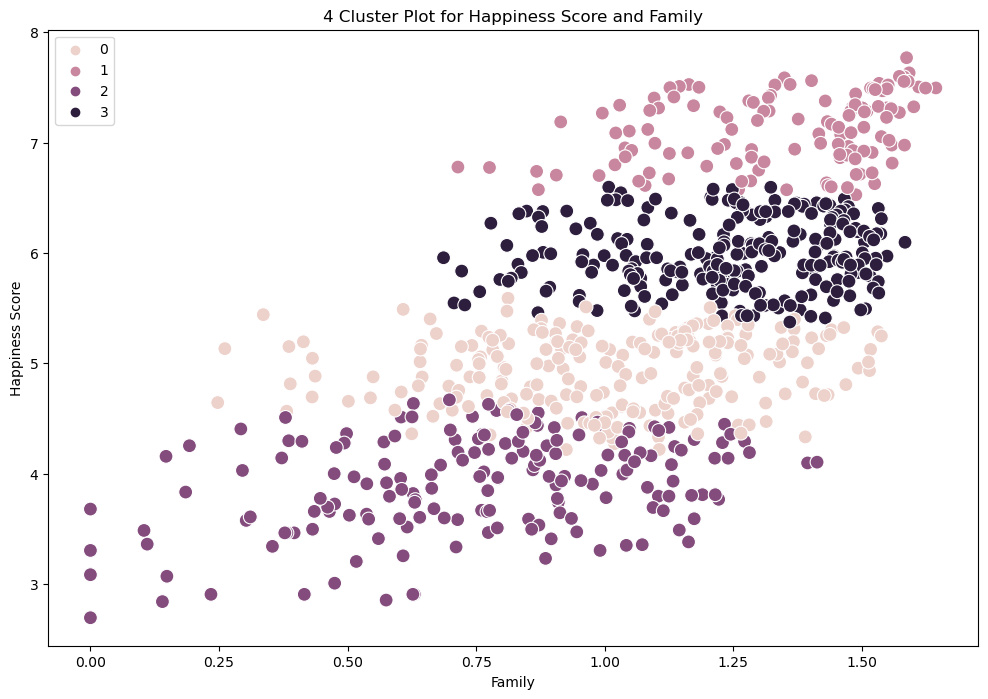

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub1['Family'], y=whr_allyearssub1['Happiness Score'], hue=kmeans4.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Family') 
plt.ylabel('Happiness Score') 
plt.title('4 Cluster Plot for Happiness Score and Family')
plt.show()
plt.savefig('4 Cluster of Family.png')

#### Cluster findings: 

## C. Freedom

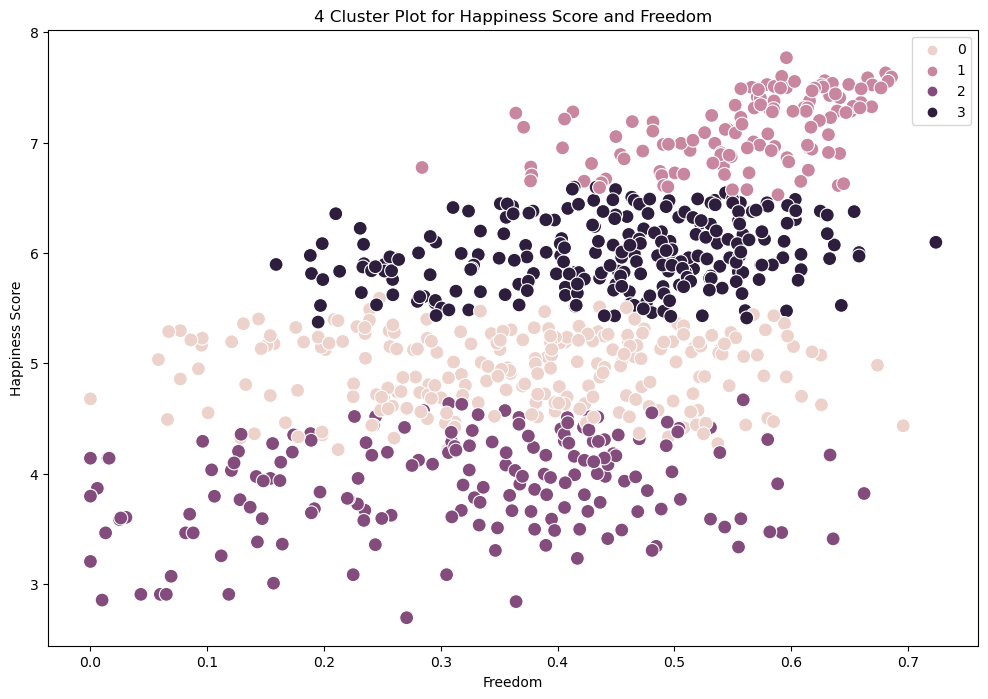

<Figure size 640x480 with 0 Axes>

In [32]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub1['Freedom'], y=whr_allyearssub1['Happiness Score'], hue=kmeans4.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Happiness Score') 
plt.title('4 Cluster Plot for Happiness Score and Freedom')
plt.show()
plt.savefig('4 Cluster of Freedom.png')

#### Cluster findings: 

### D. Generostiy 

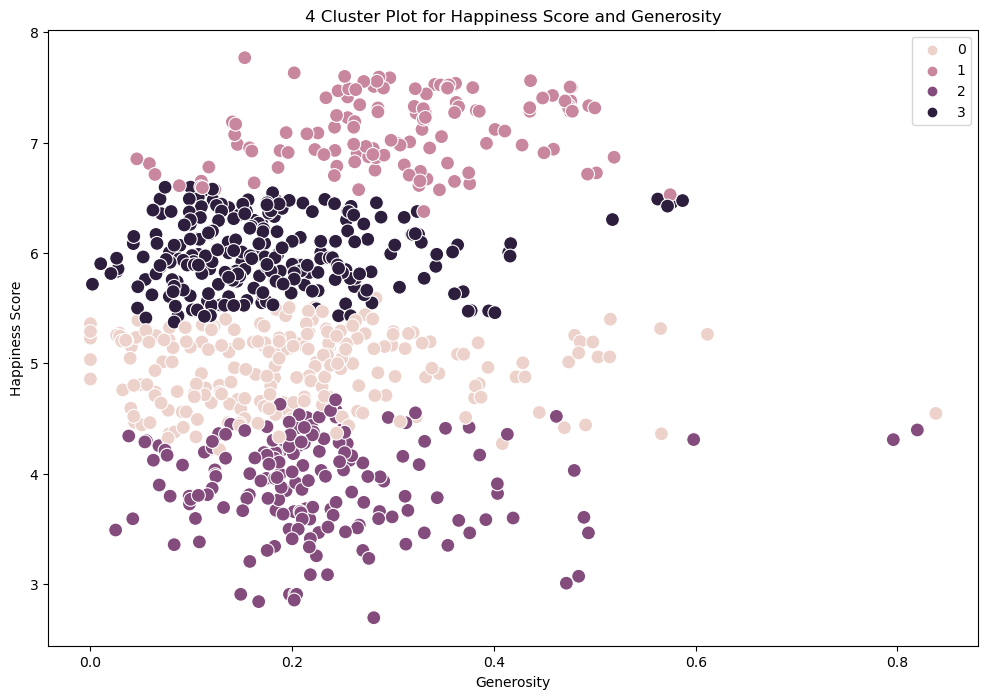

<Figure size 640x480 with 0 Axes>

In [33]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub1['Generosity'], y=whr_allyearssub1['Happiness Score'], hue=kmeans4.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score') 
plt.title('4 Cluster Plot for Happiness Score and Generosity')
plt.show()
plt.savefig('4 Cluster of Generosity.png')

#### Cluster findings: 

## E. Health

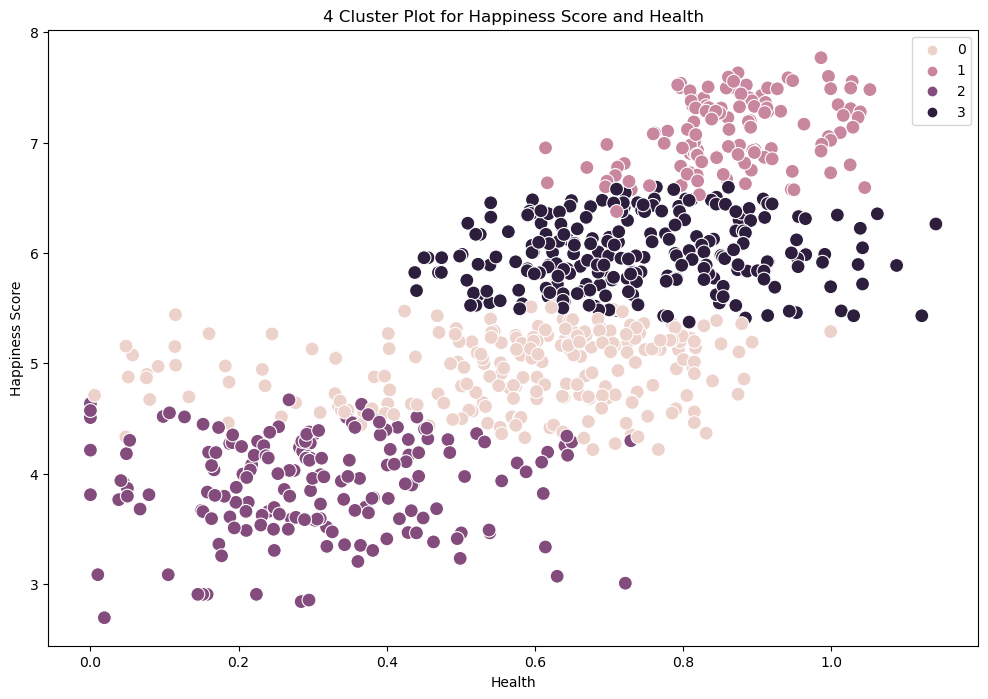

<Figure size 640x480 with 0 Axes>

In [34]:
# Plot the clusters for the "Happiness Score" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub1['Health'], y=whr_allyearssub1['Happiness Score'], hue=kmeans4.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Health') 
plt.ylabel('Happiness Score') 
plt.title('4 Cluster Plot for Happiness Score and Health')
plt.show()
plt.savefig('4 Cluster of Health.png')

#### Cluster findings: 

## F. Trust

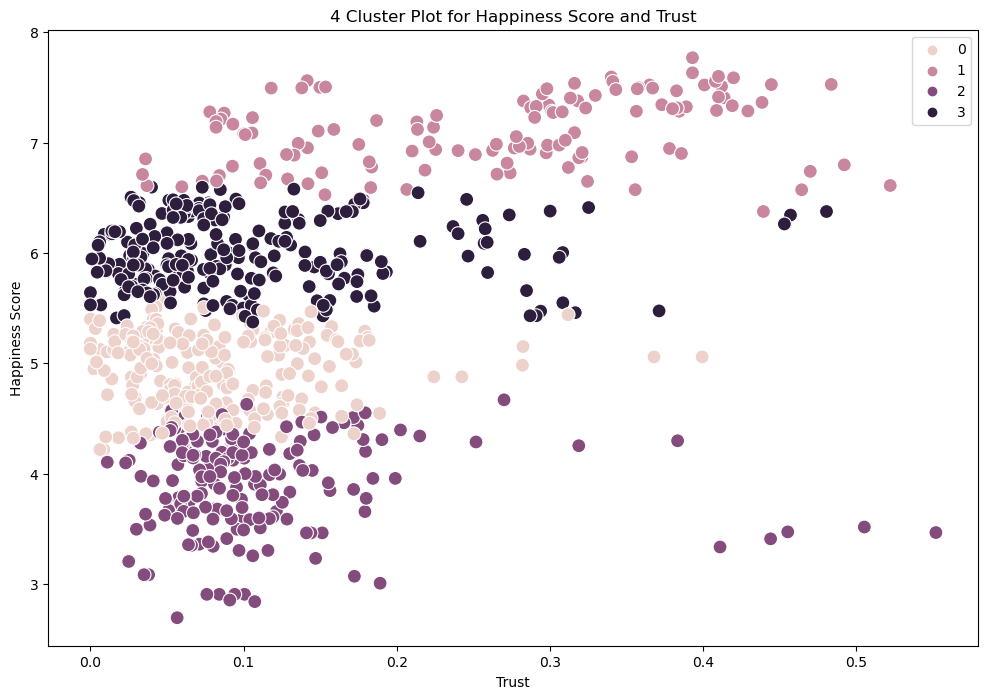

<Figure size 640x480 with 0 Axes>

In [35]:
# Plot the clusters for the "Happiness Score" and "Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub1['Trust'], y=whr_allyearssub1['Happiness Score'], hue=kmeans4.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Trust') 
plt.ylabel('Happiness Score') 
plt.title('4 Cluster Plot for Happiness Score and Trust')
plt.show()
plt.savefig('4 Cluster of Trust.png')

In [36]:
# Check each of variables individual cluster statistics

whr_allyearssub1.loc[whr_allyearssub1['Clusters4'] == 2, 'Cluster4'] = 'dark purple'
whr_allyearssub1.loc[whr_allyearssub1['Clusters4'] == 1, 'Cluster4'] = 'purple'
whr_allyearssub1.loc[whr_allyearssub1['Clusters4'] == 0, 'Cluster4'] = 'pink'

In [37]:
# Separate the data points in each cluster and calculate the variable descriptive statistics

whr_allyearssub1.groupby('Cluster4').agg({'Economy':['mean', 'median'],
                           'Family':['mean', 'median'],
                           'Freedom':['mean', 'median'],
                           'Generosity':['mean', 'median'],
                           'Health':['mean', 'median'],
                           'Trust':['mean', 'median']})

Economy            Family           Freedom          Generosity  \
                 mean  median      mean  median      mean   median       mean   
Cluster4                                                                        
dark purple  0.416309  0.3575  0.756707  0.7741  0.314778  0.33505   0.228287   
pink         0.826973  0.8860  1.012825  1.0263  0.366225  0.38100   0.202164   
purple       1.379125  1.3742  1.342216  1.4244  0.560583  0.57670   0.306176   

                        Health              Trust          
              median      mean   median      mean  median  
Cluster4                                                   
dark purple  0.20935  0.308844  0.29695  0.110599  0.0915  
pink         0.18700  0.576797  0.60460  0.083093  0.0720  
purple       0.30905  0.864974  0.86100  0.264351  0.2872

## B. Three Clusters

In [46]:
whr_allyearssub1.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust  \
0            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198   
1            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415   
2            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836   
3            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650   
4            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296   

   Clusters4 Cluster4  
0          1   purple  
1          1   purple  
2          1   purple  
3          1   purple  
4          1   purple

In [47]:
# Remove columns that are categorical for next cluster test

whr_allyearssub2 = whr_allyearssub1.drop(columns = ['Clusters4', 'Cluster4'])

In [48]:
whr_allyearssub2.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust
0            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198
1            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415
2            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836
3            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650
4            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296

In [49]:
# Recreate the k-means object with different number of clusters

kmeans3 = KMeans(n_clusters = 3)

In [51]:
# Fit the k-means object to the data

kmeans3.fit(whr_allyearssub2)

KMeans(n_clusters=3)

In [52]:
# Create a new column within the dataframe to display the number of clusters

whr_allyearssub2['Clusters3'] = kmeans3.fit_predict(whr_allyearssub2)

In [53]:
# View the first five rows to see if the cluster3 column was added

whr_allyearssub2.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust  \
0            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198   
1            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415   
2            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836   
3            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650   
4            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296   

   Clusters3  
0          0  
1          0  
2          0  
3          0  
4          0

In [54]:
# Check how many observations fall into each cluster

whr_allyearssub2['Clusters3'].value_counts()

1    307
2    276
0    194
Name: Clusters3, dtype: int64

## A. Economy 

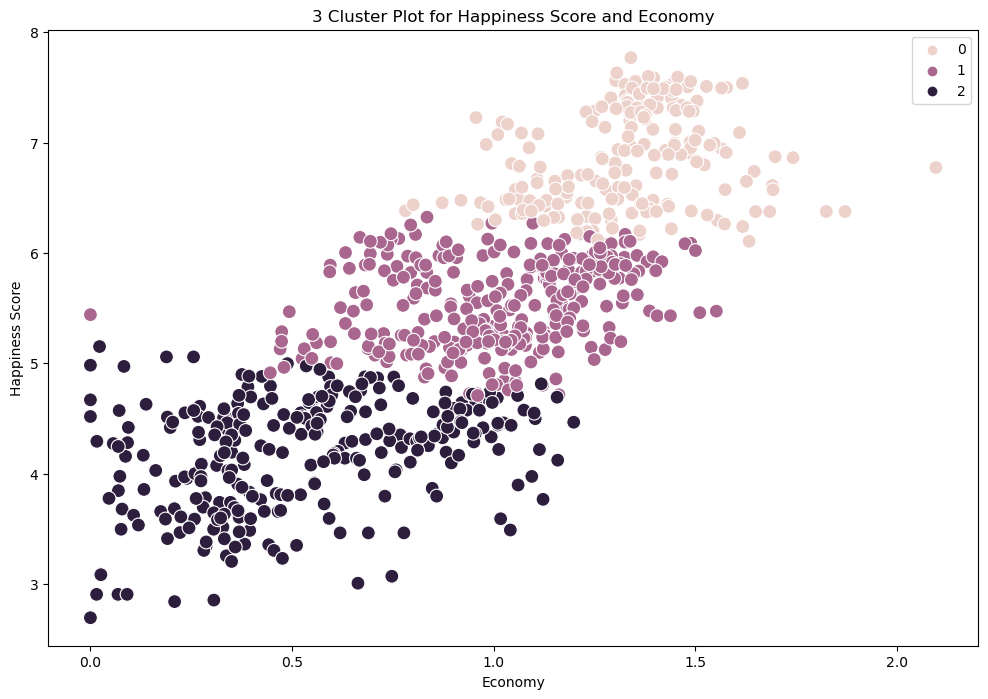

<Figure size 640x480 with 0 Axes>

In [55]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub2['Economy'], y=whr_allyearssub2['Happiness Score'], hue=kmeans3.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Economy') 
plt.ylabel('Happiness Score') 
plt.title('3 Cluster Plot for Happiness Score and Economy')
plt.show()
plt.savefig('3 Cluster of Economy.png') 

## B. Family 

In [56]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub2['Family'], y=whr_allyearssub2['Happiness Score'], hue=kmeans3.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Family') 
plt.ylabel('Happiness Score') 
plt.title('3 Cluster Plot for Happiness Score and Family')
plt.show()
plt.savefig('3 Cluster of Family.png')

<Figure size 640x480 with 0 Axes>

## C. Freedom

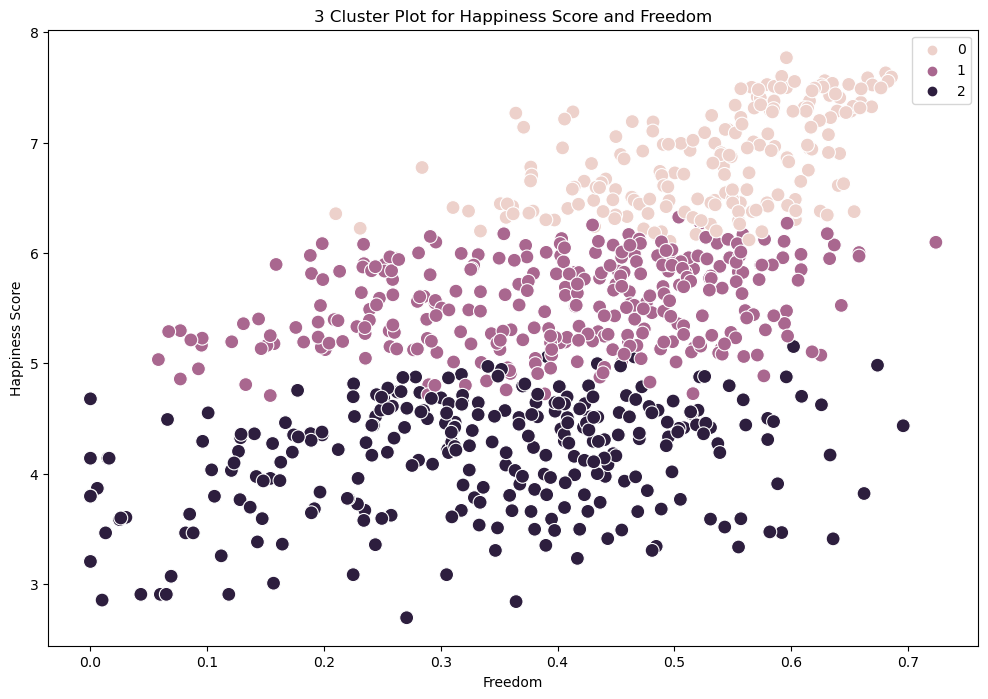

<Figure size 640x480 with 0 Axes>

In [57]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub2['Freedom'], y=whr_allyearssub2['Happiness Score'], hue=kmeans3.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Happiness Score') 
plt.title('3 Cluster Plot for Happiness Score and Freedom')
plt.show()
plt.savefig('3 Cluster of Freedom.png')

## D. Generosity

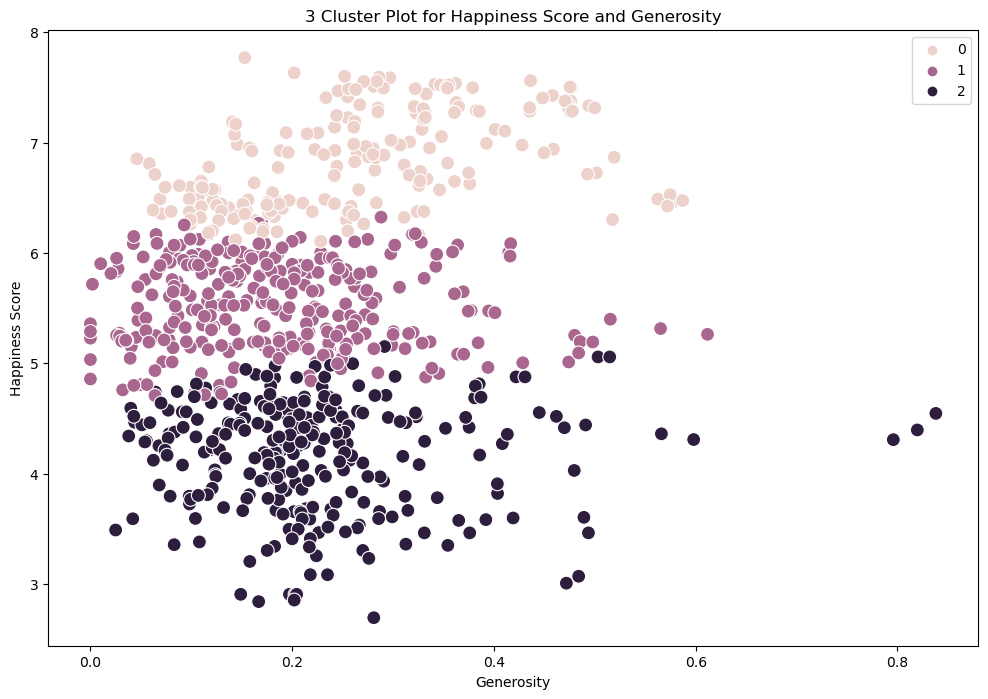

<Figure size 640x480 with 0 Axes>

In [58]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub2['Generosity'], y=whr_allyearssub2['Happiness Score'], hue=kmeans3.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score') 
plt.title('3 Cluster Plot for Happiness Score and Generosity')
plt.show()
plt.savefig('3 Cluster of Generosity.png')

## E. Health

In [59]:
# Plot the clusters for the "Happiness Score" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub2['Health'], y=whr_allyearssub2['Happiness Score'], hue=kmeans3.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Health') 
plt.ylabel('Happiness Score') 
plt.title('3 Cluster Plot for Happiness Score and Health')
plt.show()
plt.savefig('3 Cluster of Health.png')

<Figure size 640x480 with 0 Axes>

# F. Trust 

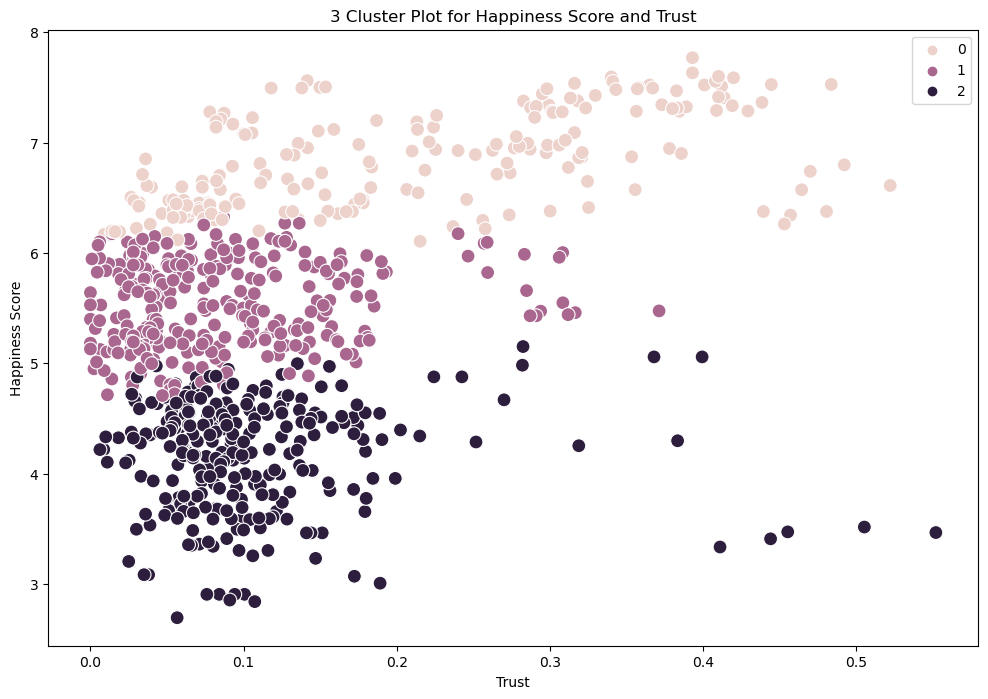

<Figure size 640x480 with 0 Axes>

In [60]:
# Plot the clusters for the "Happiness Score" and "Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=whr_allyearssub2['Trust'], y=whr_allyearssub2['Happiness Score'], hue=kmeans3.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Trust') 
plt.ylabel('Happiness Score') 
plt.title('3 Cluster Plot for Happiness Score and Trust')
plt.show()
plt.savefig('3 Cluster of Trust.png')

In [62]:
# Check each of variables individual cluster statistics

whr_allyearssub2.loc[whr_allyearssub2['Clusters3'] == 2, 'Cluster3'] = 'dark purple'
whr_allyearssub2.loc[whr_allyearssub2['Clusters3'] == 1, 'Cluster3'] = 'purple'
whr_allyearssub2.loc[whr_allyearssub2['Clusters3'] == 0, 'Cluster3'] = 'pink'

In [63]:
# Separate the data points in each cluster and calculate the variable descriptive statistics

whr_allyearssub2.groupby('Cluster3').agg({'Economy':['mean', 'median'],
                           'Family':['mean', 'median'],
                           'Freedom':['mean', 'median'],
                           'Generosity':['mean', 'median'],
                           'Health':['mean', 'median'],
                           'Trust':['mean', 'median']})

Economy             Family            Freedom           \
                 mean   median      mean   median      mean   median   
Cluster3                                                               
dark purple  0.519757  0.47400  0.812743  0.84790  0.335630  0.35050   
pink         1.333985  1.34275  1.323426  1.36925  0.531841  0.55005   
purple       1.008643  1.02560  1.163694  1.20790  0.401871  0.41830   

            Generosity            Health              Trust           
                  mean  median      mean   median      mean   median  
Cluster3                                                              
dark purple   0.223026  0.2040  0.376550  0.35785  0.105759  0.08795  
pink          0.268202  0.2615  0.834254  0.84115  0.214928  0.19665  
purple        0.183291  0.1719  0.683936  0.68400  0.086198  0.07250

# 07. Analysis 

#### Cluster statistic findings:

#### The cluster analysis was run with 4 and 3 clusters.  The model with 3 clusters performed better than 4 cluster.  

##### The analysis does make sense it shows Generosity and Trust are not the biggest factors for Happiness Score.  

##### The pink cluster for each variable has the highest mean and median. 

##### A futher dive now into which countries are displayed within the pink cluster. 